In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcaGF5a19cT25lRHJpdmVcRGVza3RvcFwwMV9weXRob25fbWF0aF9tbF9jb3Vyc2VcbWF0aFxIb21ld29ya3Ncc29sdXRpb25zX3F1YXJ0bw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\hayk_\AppData\Local\Temp\ipykernel_26672\1268175638.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662373052.0, "C:\\Users\\hayk_\\AppData\\Local\\Programs\\Python\\Python310\\li

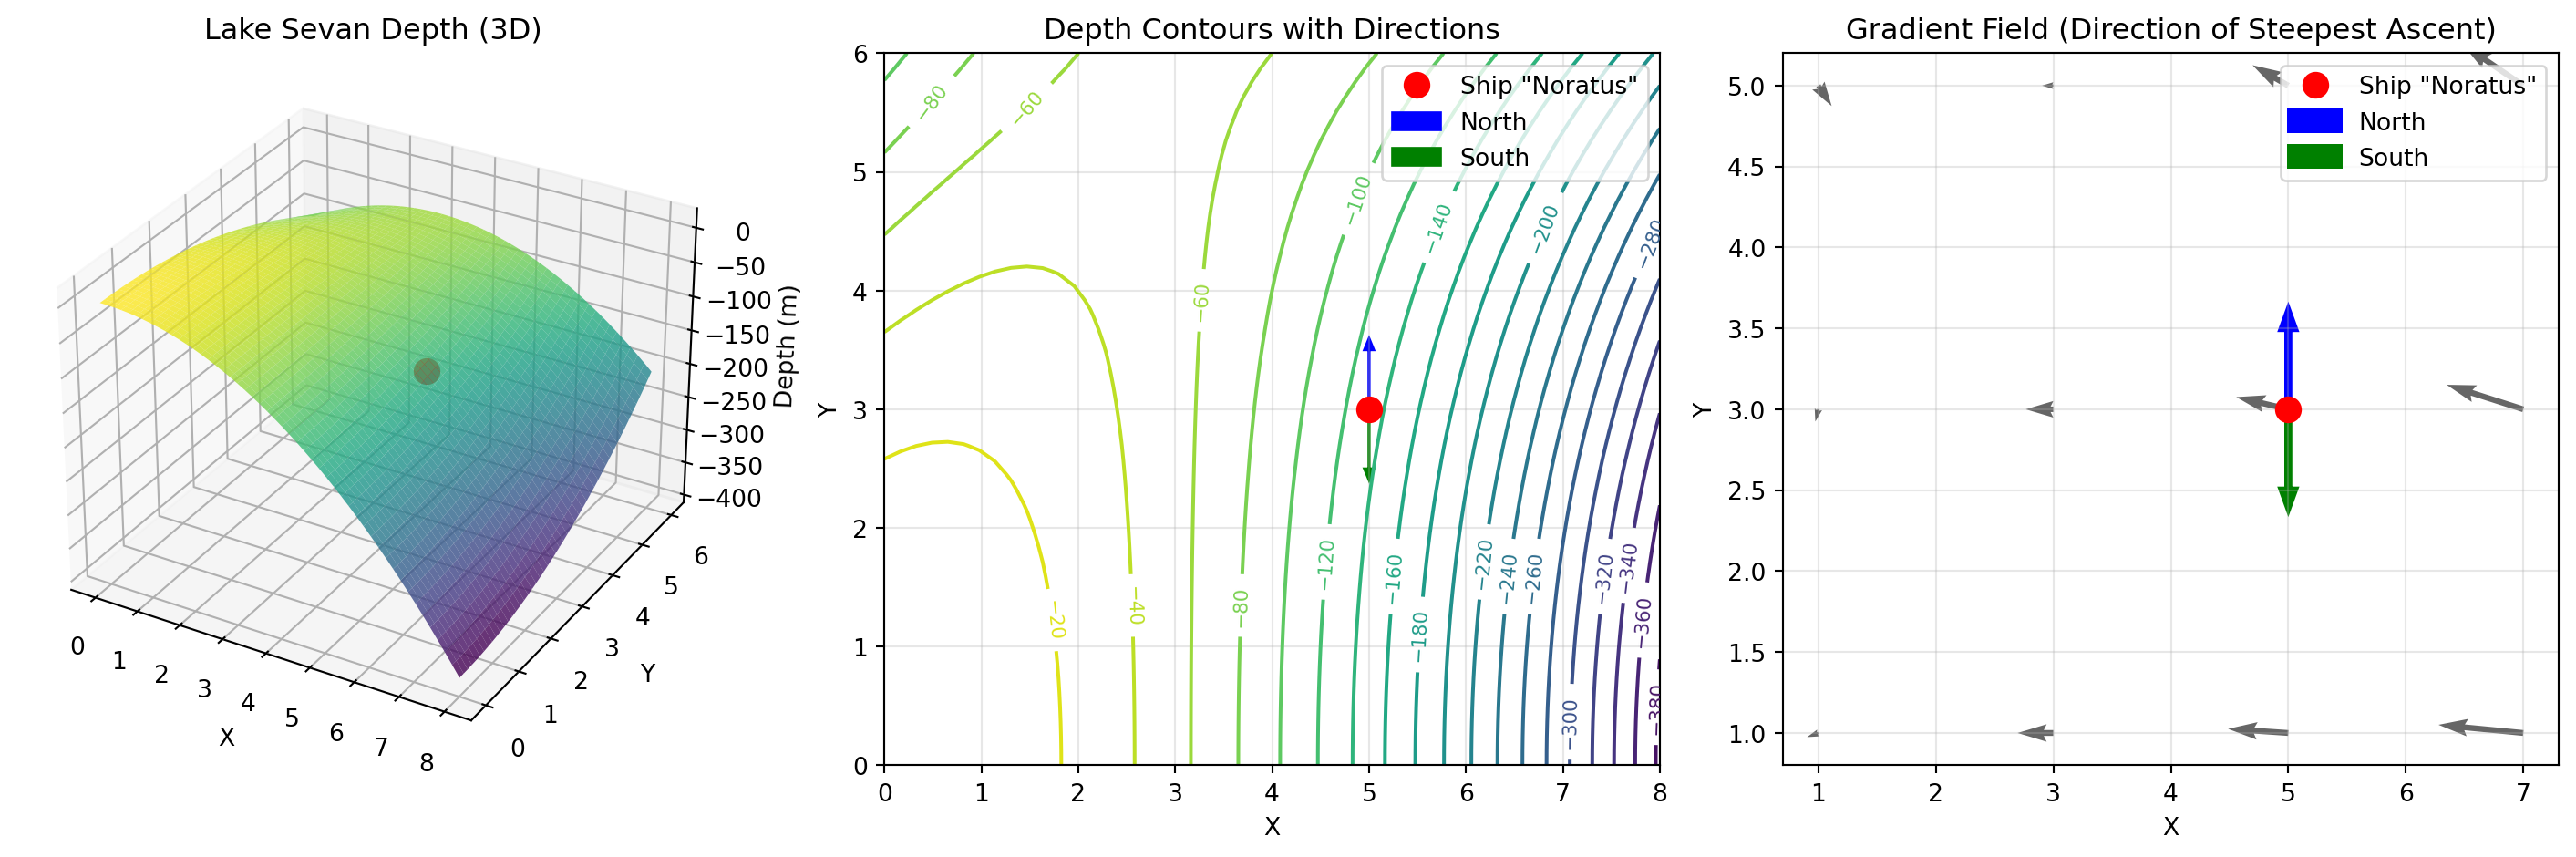

In [2]:
#| label: fig-lake-sevan
#| fig-cap: Lake Sevan Depth Visualization
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the depth function
def depth(x, y):
    return x * y**2 - 6 * x**2 - 3 * y**2

# Create meshgrid for plotting
x = np.linspace(0, 8, 50)
y = np.linspace(0, 6, 50)
X, Y = np.meshgrid(x, y)
Z = depth(X, Y)

# Create 3D surface plot
fig = plt.figure(figsize=(15, 5))

# 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.scatter([5], [3], [depth(5, 3)], color='red', s=100, label='Ship "Noratus"')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Depth (m)')
ax1.set_title('Lake Sevan Depth (3D)')

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(5, 3, 'ro', markersize=10, label='Ship "Noratus"')
ax2.arrow(5, 3, 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='North')
ax2.arrow(5, 3, 0, -0.5, head_width=0.1, head_length=0.1, fc='green', ec='green', label='South')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Depth Contours with Directions')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gradient field
ax3 = fig.add_subplot(133)
# Calculate gradient
dx = 2  # spacing for gradient arrows
dy = 2
x_grad = np.arange(1, 8, dx)
y_grad = np.arange(1, 6, dy)
X_grad, Y_grad = np.meshgrid(x_grad, y_grad)

# Gradient components
grad_x = Y_grad**2 - 12*X_grad
grad_y = 2*X_grad*Y_grad - 6*Y_grad

# Plot gradient field
ax3.quiver(X_grad, Y_grad, grad_x, grad_y, alpha=0.6)
ax3.plot(5, 3, 'ro', markersize=10, label='Ship "Noratus"')
ax3.arrow(5, 3, 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue', linewidth=3, label='North')
ax3.arrow(5, 3, 0, -0.5, head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=3, label='South')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Gradient Field (Direction of Steepest Ascent)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

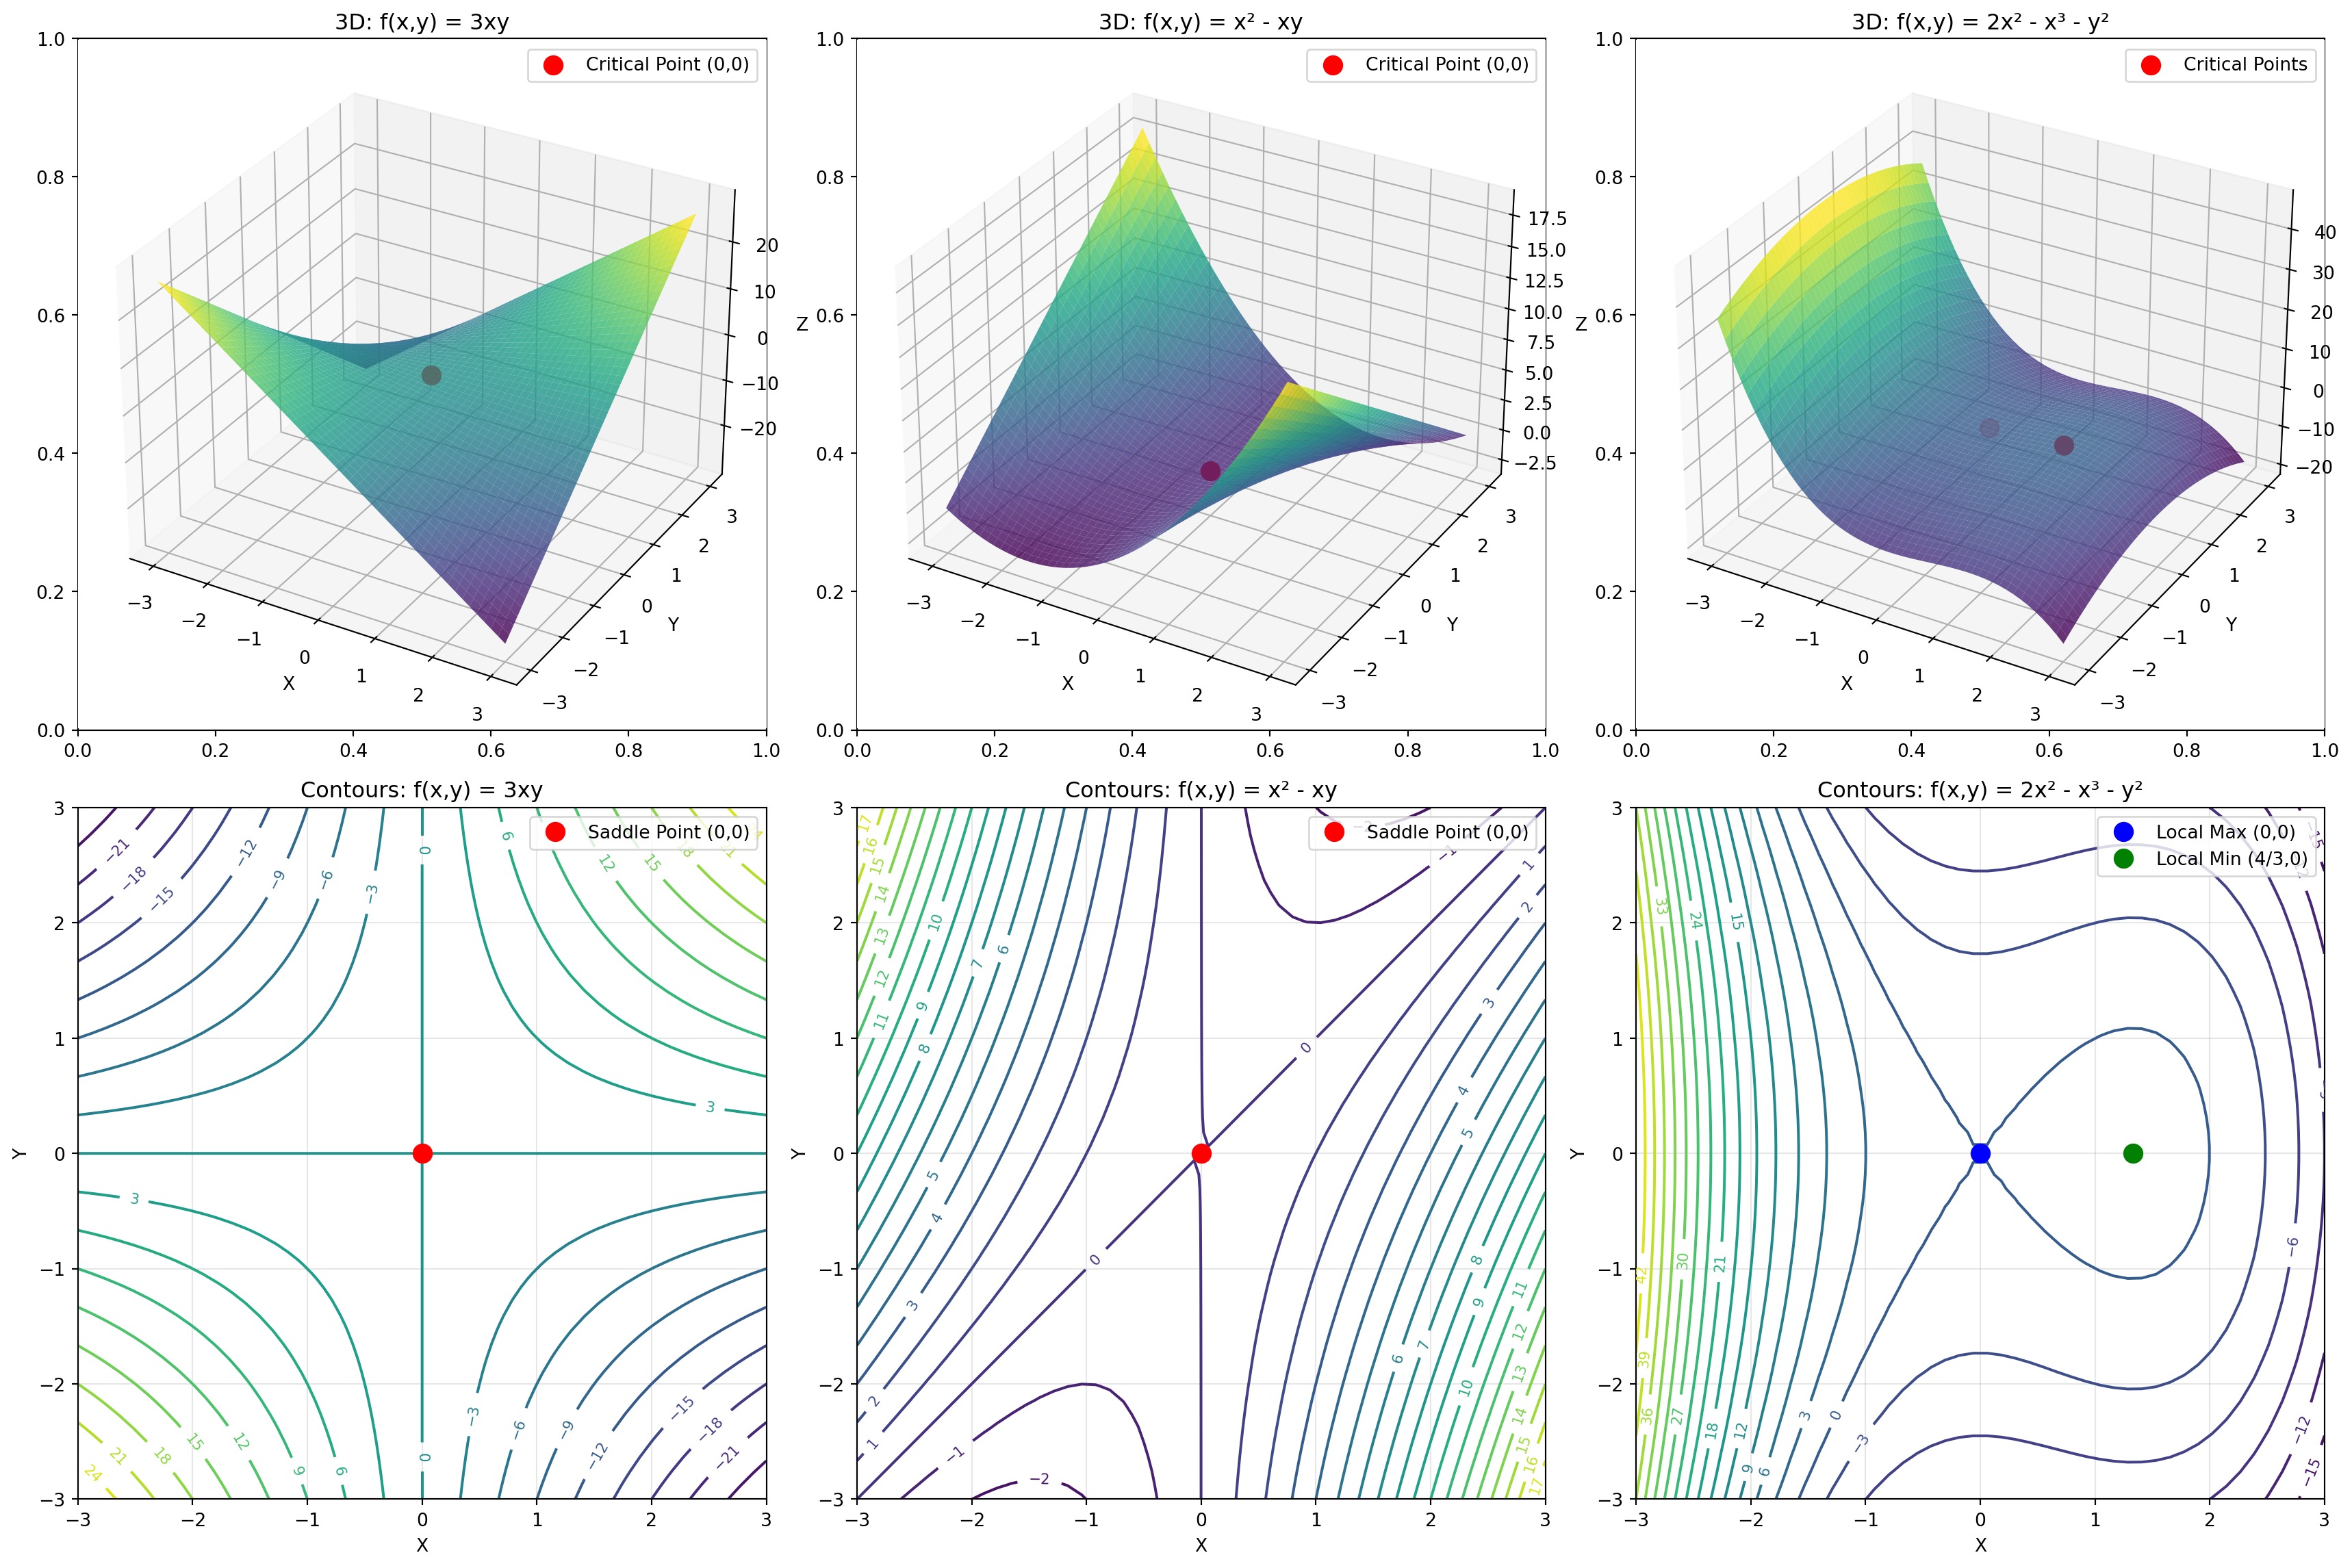

In [3]:
#| label: fig-extrema-analysis
#| fig-cap: Functions and Their Critical Points
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define functions
def f1(x, y):
    return 3 * x * y

def f2(x, y):
    return x**2 - x * y

def f3(x, y):
    return 2 * x**2 - x**3 - y**2

functions = [f1, f2, f3]
titles = ['f(x,y) = 3xy', 'f(x,y) = x² - xy', 'f(x,y) = 2x² - x³ - y²']

# Create meshgrid
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (func, title) in enumerate(zip(functions, titles)):
    Z = func(X, Y)
    
    # 3D surface plot
    ax_3d = fig.add_subplot(2, 3, i+1, projection='3d')
    surf = ax_3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    # Mark critical points
    if i == 0:  # f(x,y) = 3xy
        ax_3d.scatter([0], [0], [0], color='red', s=100, label='Critical Point (0,0)')
    elif i == 1:  # f(x,y) = x² - xy
        ax_3d.scatter([0], [0], [0], color='red', s=100, label='Critical Point (0,0)')
    elif i == 2:  # f(x,y) = 2x² - x³ - y²
        ax_3d.scatter([0, 4/3], [0, 0], [func(0,0), func(4/3,0)], color='red', s=100, label='Critical Points')
    
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_title(f'3D: {title}')
    ax_3d.legend()
    
    # Contour plot
    ax_contour = axes[1, i]
    contour = ax_contour.contour(X, Y, Z, levels=20)
    ax_contour.clabel(contour, inline=True, fontsize=8)
    
    # Mark critical points
    if i == 0:
        ax_contour.plot(0, 0, 'ro', markersize=10, label='Saddle Point (0,0)')
    elif i == 1:
        ax_contour.plot(0, 0, 'ro', markersize=10, label='Saddle Point (0,0)')
    elif i == 2:
        ax_contour.plot(0, 0, 'bo', markersize=10, label='Local Max (0,0)')
        ax_contour.plot(4/3, 0, 'go', markersize=10, label='Local Min (4/3,0)')
    
    ax_contour.set_xlabel('X')
    ax_contour.set_ylabel('Y')
    ax_contour.set_title(f'Contours: {title}')
    ax_contour.legend()
    ax_contour.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

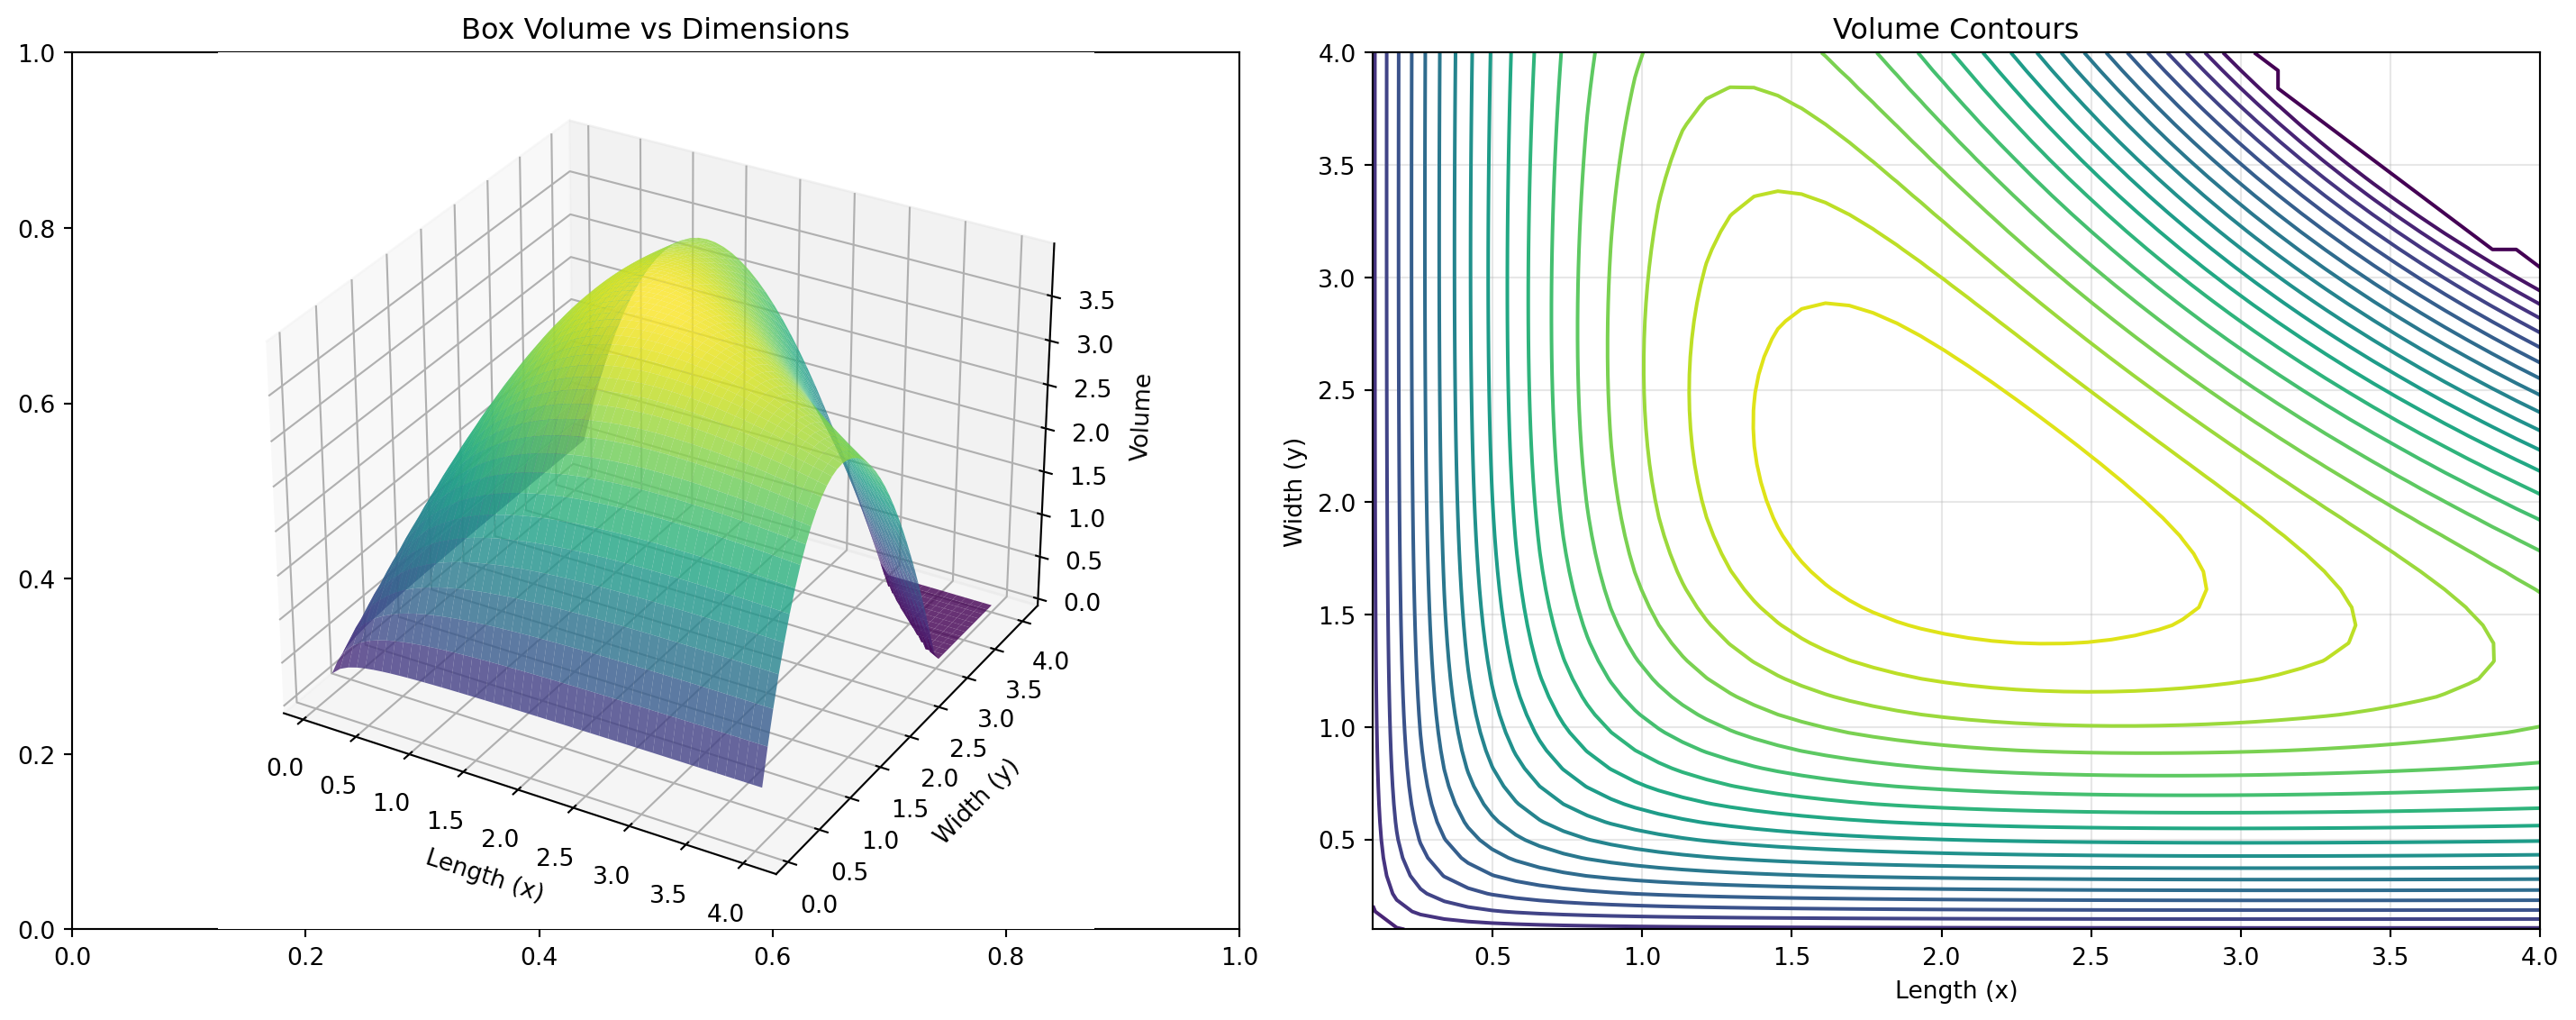

Analytical Solution:
For a square base (x = y), optimal dimension is x = y = 2
Optimal height z = (12 - 4)/(4) = 2
Maximum volume = 2 × 2 × 2 = 8 cubic meters


In [4]:
#| label: fig-box-optimization
#| fig-cap: Box Volume Optimization
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Volume function V(x,y) = xy(12-xy)/(2x+2y)
def volume(x, y):
    denominator = 2*x + 2*y
    # Avoid division by zero
    denominator = np.where(denominator == 0, np.inf, denominator)
    return x * y * (12 - x*y) / denominator

# Create meshgrid
x = np.linspace(0.1, 4, 50)
y = np.linspace(0.1, 4, 50)
X, Y = np.meshgrid(x, y)

# Calculate volume, but only where constraint is satisfied
V = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        if X[i,j] * Y[i,j] <= 12:  # Constraint check
            V[i,j] = volume(X[i,j], Y[i,j])
        else:
            V[i,j] = 0

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, V, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Length (x)')
ax1.set_ylabel('Width (y)')
ax1.set_zlabel('Volume')
ax1.set_title('Box Volume vs Dimensions')

# Contour plot
ax2.contour(X, Y, V, levels=20)
ax2.set_xlabel('Length (x)')
ax2.set_ylabel('Width (y)')
ax2.set_title('Volume Contours')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate optimal dimensions analytically
print("Analytical Solution:")
print("For a square base (x = y), optimal dimension is x = y = 2")
print("Optimal height z = (12 - 4)/(4) = 2")
print("Maximum volume = 2 × 2 × 2 = 8 cubic meters")